In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
heart_df = pd.read_csv("C:\\Users\\abhis\\Downloads\\heart_disease_data.csv")
print(heart_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [17]:
# Columns Descriptions

# Target Variable(Output) :-
# target :- This is the output variable that the Decision Tree model predicts.
# Value 0 :- No heart disease.
# Value 1 :- Presence of heart disease.
# The model creates decision rules using other features to classify patients.
# All other columns are used as input features to predict this column.
# The goal of the project is to correctly classify this variable.

# Input Features(Independent Variables):-
#1) age :- Represents the age of the patient in years.
# Higher age increases the risk of heart disease.
# The Decision Tree may split data at certain ages (e.g., age > 50).
# It helps in identifying high-risk age groups.
# Age is an important risk factor in classification.

#2) sex :- Represents Gender of the Patient.
# Value 0 → Female, 1 → Male.
# Heart disease risk differs between males and females.
# The Decision Tree may use this feature to create early splits.
# It helps refine classification rules.

#3) cp(Chest Pain Type) :- Indicates type of chest pain (values 0–3).
# Different types of chest pain indicate different severity levels.
# Some chest pain types strongly relate to heart disease.
# The Decision Tree may branch based on cp values.
# It is one of the strong predictors in this dataset.

#4) trestbps :- Resting blood pressure (in mm Hg).
# High blood pressure increases heart disease risk.
# The Decision Tree may create threshold splits (e.g., trestbps > 140).
# Abnormal values indicate possible heart stress.
# It contributes to risk classification.

#5) chol :-Serum cholesterol level (mg/dl).
# High cholesterol leads to artery blockage.
# The tree may split at high cholesterol levels.
# It is a major cardiovascular risk factor.
# Helps in predicting presence of heart disease.


#6) fbs(Fasting Blood Sugar) :- Indicates whether fasting blood sugar > 120 mg/dl.
# Value 0 → False, 1 → True.
# High blood sugar increases heart risk.
# The Decision Tree may use this as a condition for splitting.
# It supports classification but may not be the strongest feature.


#7) restecg :-  Resting electrocardiographic results (values 0–2).
# Shows heart electrical activity.
# Abnormal ECG results indicate heart problems.
# The Decision Tree may branch based on ECG type.
# It improves prediction accuracy.

#8) thalach :- Maximum heart rate achieved.
# Lower maximum heart rate may indicate heart issues.
# The tree may create splits like thalach < certain value.
# It is an important indicator of heart health.
# Often a significant predictor in classification.

#9) exang :- Exercise-induced angina.
# Value 0 → No, 1 → Yes.
# Chest pain during exercise indicates possible heart disease.
# The Decision Tree may use this as a key decision rule.
# It strongly contributes to classification.

#10) oldpeak  :- Represents ST depression induced by exercise.
# Higher values indicate abnormal heart response.
# The Decision Tree may create threshold-based splits.
# It reflects severity of heart condition.
# Important for detecting heart disease risk.

#11) slope :-  Slope of the peak exercise ST segment (0–2).
# Indicates heart performance during stress.
# Different slope values show different heart conditions.
# The tree branches based on these categories.
# It helps refine predictions.

#12) ca :- Number of major vessels colored by fluoroscopy (0–3).
# Higher number indicates more blocked vessels.
# Strongly related to heart disease presence.
# The Decision Tree often selects this as an important splitting feature.
# It is a powerful predictor.

#13) thal :-  Thalassemia test result (values 0–3).
# Indicates blood disorder affecting oxygen supply.
# Certain thal values are strongly linked to heart disease.
# The Decision Tree creates branches based on thal type.
# It is one of the important classification features.

# EDA

In [3]:
# Display first 5 rows of the dataset
print("\nFirst five rows of the dataset:\n", heart_df.head())


First five rows of the dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# Display last 5 rows of the dataset
print("\nLast five rows of the dataset:\n", heart_df.tail())


Last five rows of the dataset:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  


In [5]:
# Check for missing values
print("\nMissing values in dataset:\n", heart_df.isnull().sum())



Missing values in dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# Summary statistics of numerical columns in the dataset
print("\nSummary statistics:\n", heart_df.describe())



Summary statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std  

In [7]:
# Infornmation about the columns in the dataset
print("\nInfornmation about the Dataset:\n", heart_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Infornmation about the Dataset:
 None


In [8]:
# Checking for duplicate records
print("\nNumber of duplicate rows:", heart_df.duplicated().sum())



Number of duplicate rows: 1


In [10]:
# Checking for unique values in each column
print("\nUnique values in each column:\n", heart_df.nunique())


Unique values in each column:
 age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [40]:
# checking the distribution of Target Variable
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

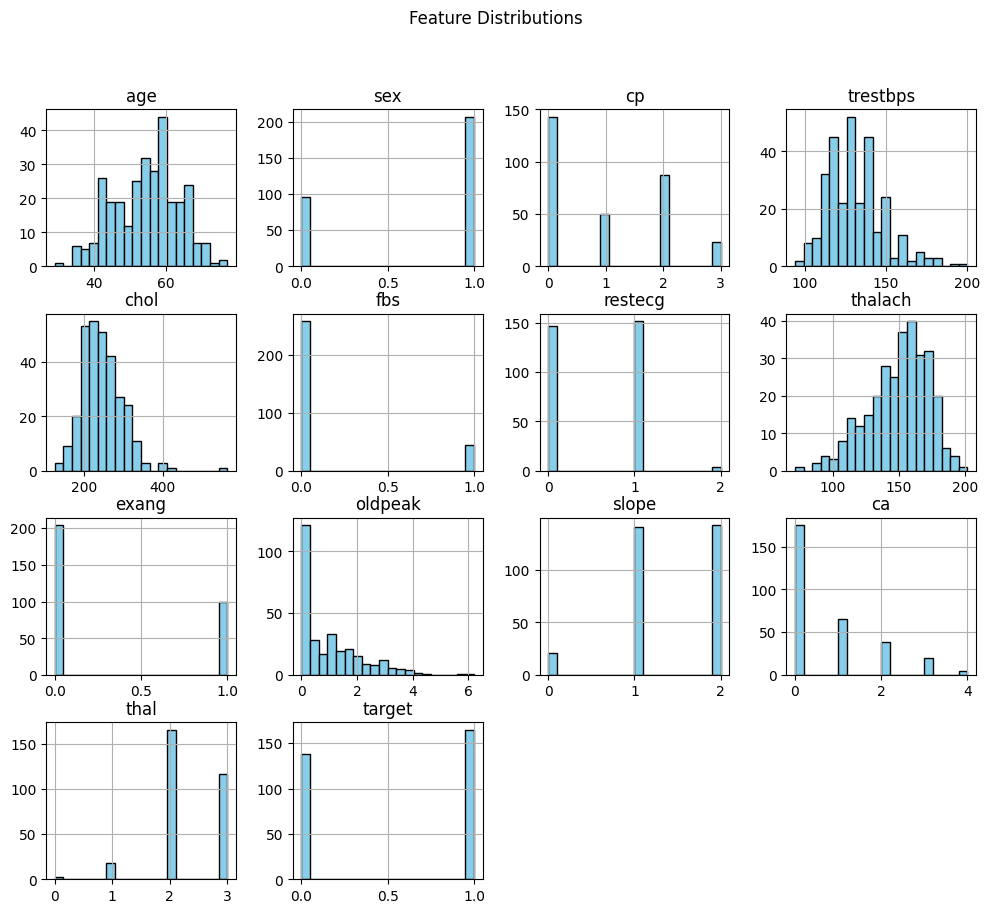

In [12]:
# Histogram of numerical features
heart_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


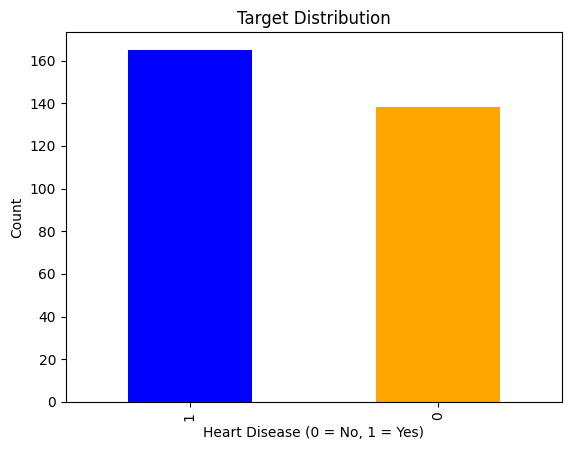

In [19]:
# Visualizing class distribution
heart_df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Target Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


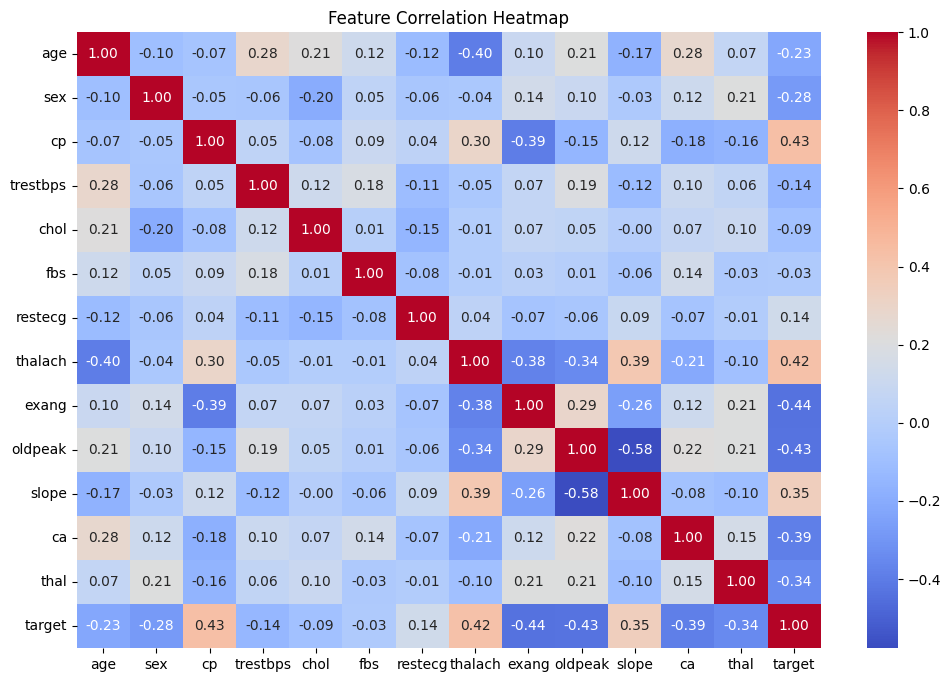

In [18]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Engineering

In [22]:
# Create Age Category.

heart_df['age_group'] = pd.cut(heart_df['age'],
                         bins=[0, 40, 55, 70, 100],
                         labels=['Young', 'Middle', 'Senior', 'Old'])
print(heart_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target age_group  
0        0   0     1       1    Senior  
1    

In [25]:
# Create Cholesterol Ratio Feature
heart_df['chol_age_ratio'] = heart_df['chol'] / heart_df['age']
print(heart_df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target age_group  chol_age_ratio  
0        0   0     1       1  

## Model Training

In [32]:
# Define Features and Target

X = heart_df.drop('target', axis=1)
y = heart_df['target']


# Split Dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Decision Tree

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

## Model Evaluation

## Accuracy

In [33]:
# Training Accuracy

train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("The Accuracy of the Training Data", train_accuracy)


The Accuracy of the Training Data 0.8636363636363636


1) The model was trained using Training Data.
2) Accuracy ≈ 86%
3) This means that the model correctly predicted about 86 out of 100 transactions in the training dataset.

In [34]:
# Testing Accuracy

test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("The Accuracy of the Testing Data", test_accuracy)


The Accuracy of the Testing Data 0.8852459016393442


1) Test data was not seen by the model before.

2)  Accuracy ≈ 88%.
   
3)  This means that the model correctly predicted about 88 out of 100 unseen Transactions.

## Building a Heart Disease Predictive System

In [44]:
# User Input (Original 13 Features)
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# Convert to DataFrame using original feature names
original_columns = ['age','sex','cp','trestbps','chol','fbs',
                    'restecg','thalach','exang','oldpeak',
                    'slope','ca','thal']

input_df = pd.DataFrame([input_data], columns=original_columns)
 
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# Prediction
prediction = model.predict(input_df)

print("Prediction Value:", prediction)

if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
     print("The Person HAS Heart Disease")

Prediction Value: [0]
The Person does not have Heart Disease
